### Doğrusal Regresyonda Tahmin Başarısı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('datasets/advertising.csv')
df

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50


In [2]:
# Örneklendirmek adına yani regresyonun temel mantığını kavrayabilmek için bu dataframe içerisinden 2 tane değişkeni seçelim:
x = df[["TV"]]

# bağımlı değişkenimiz...
y = df[["sales"]]

###### Model

In [3]:
reg_model = LinearRegression().fit(x, y)

# sabit (b - bias)
reg_model.intercept_[0]

7.032593549127695

In [4]:
# w (tv'nin katsayısı - w1)
reg_model.coef_[0][0]

0.04753664043301975

###### Tahmin

In [5]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

###### Modelin Görselleştirilmesi

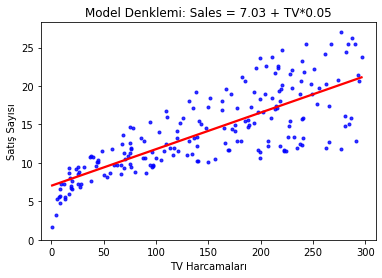

In [6]:
g = sns.regplot(x = x, y = y, scatter_kws={'color': 'b', 's': 9},
               ci=False, color = "r")

# ci Güven aralığı argümanıdır.

# Grafiğe ana başlık ekler: 2'ler ile grafik biçimlendirilmiştir.
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")

# y ve x eksenlerinin isimlendirilmesi:
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

### Tahmin Başarısı

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

###### MSE

In [8]:
# mean_squared_error'a gerçek değerleri ve tahmin edilen değerleri veririz.
mean_squared_error(y, y_pred)

NameError: name 'y_pred' is not defined

In [9]:
# Ancak elimizde bütün tahminler yok. Bu yüzden şunu yapalım:
y_pred = reg_model.predict(x)
y_pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [10]:
# Ortalama hatayı verir:
mean_squared_error(y, y_pred)

# Bu iyi mi kötü mü bunu bilmiyoruz. Olmasını istediğimiz şey bunun en küçük değere (mümkün olduğu kadar 0'a) gitmesidir.

10.512652915656757

In [11]:
# MSE olduğu için değer daha da yüksek çıkabilirdi. Demek ki çok kötü bir noktada değiliz.
# Ancak yine de bir yere koyamıyoruz. Bu sebeple şunu yapacağız:
y.mean()

sales   14.02
dtype: float64

In [12]:
y.std()

sales   5.22
dtype: float64

In [13]:
# Hem ortalama hem standart sapmaya baktığımızda ortalaması 14 iken standart sapması 5, yani 19 ile 9 arasında değerler 
# değişiyor gibi gözüküyor. Bu durumda elde ettiğimiz 10 değeri sanki birazcık büyük gibi gözüküyor. Bu gibi durumlarda 
# bağımlı değişkenin ortalaması ve standart sapmasına bakıp yorum yapıyoruz.

###### RMSE

In [14]:
# Yukarıdan gelen ifadenin kareköküdür:
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

###### MAE

In [15]:
mean_absolute_error(y, y_pred)

2.549806038927486

In [16]:
# MAE daha küçük çıktı ancak sırf bu yüzden daha iyi diyemeyiz. Buradaki daha iyi kriteri birbiriyle kıyası değildir.

###### R-KARE

In [17]:
reg_model.score(x, y)

0.611875050850071

* DİKKAT : R-Kare doğrusal regresyon modellerinde modelin başarısına ilişkin çok çok önemli olan bir metriktir. Bu değer veri setindeki bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir. Yani bu veri setinde bir tane değişken var. Televizyon değişkeninin satış değişkenindeki değişikliği açıklama yüzdesidir. Bu modelde bağımsız değişkenler bağımlı değişkenin %61'ini açıklayabilmektedir şeklinde yorumlanabilir.

* KRİTİK BİR DİKKAT : Değişken sayısı arttıkça R-Kare şişmeye meyillidir. Burada düzeltilmiş R-Kare değerini de göz önünde bulundurulması gerekir. Konuya istatistiksel, ekonometrik, iktisadi modeller açısından bakmıyoruz, bundan dolayı bu modellerin kat sayılarının ve modellerin anlamlılığı, t istatistikleri gibi normallik varsayımı ve diğer bazı varsayımlar gibi varsayımlarla özetle istatistiki çıktılarla ilgilenmiyoruz. Konuya sadece makine öğrenmesi açısından bakıyoruz.